# POC para detecção de fraudes em cartões de crédito

Mais informações sobre o dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3

In [3]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xbg
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)


df = pd.read_csv('/home/tercio/projects/tercio/MachineLearning/Datasets/CreditCardFraud/creditcard.csv')






/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
print df.describe()
df.info()
df.head()

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
feature_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10' ,'V11' ,'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Train_set,Test_set = train_test_split(df,test_size=0.2,random_state=42)

X = Train_set.loc[:, feature_cols]
y = Train_set.Class

X_test = Test_set.loc[:, feature_cols]
y_test = Test_set.Class

X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000398,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.774045,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.211969,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.062614,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.133017,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


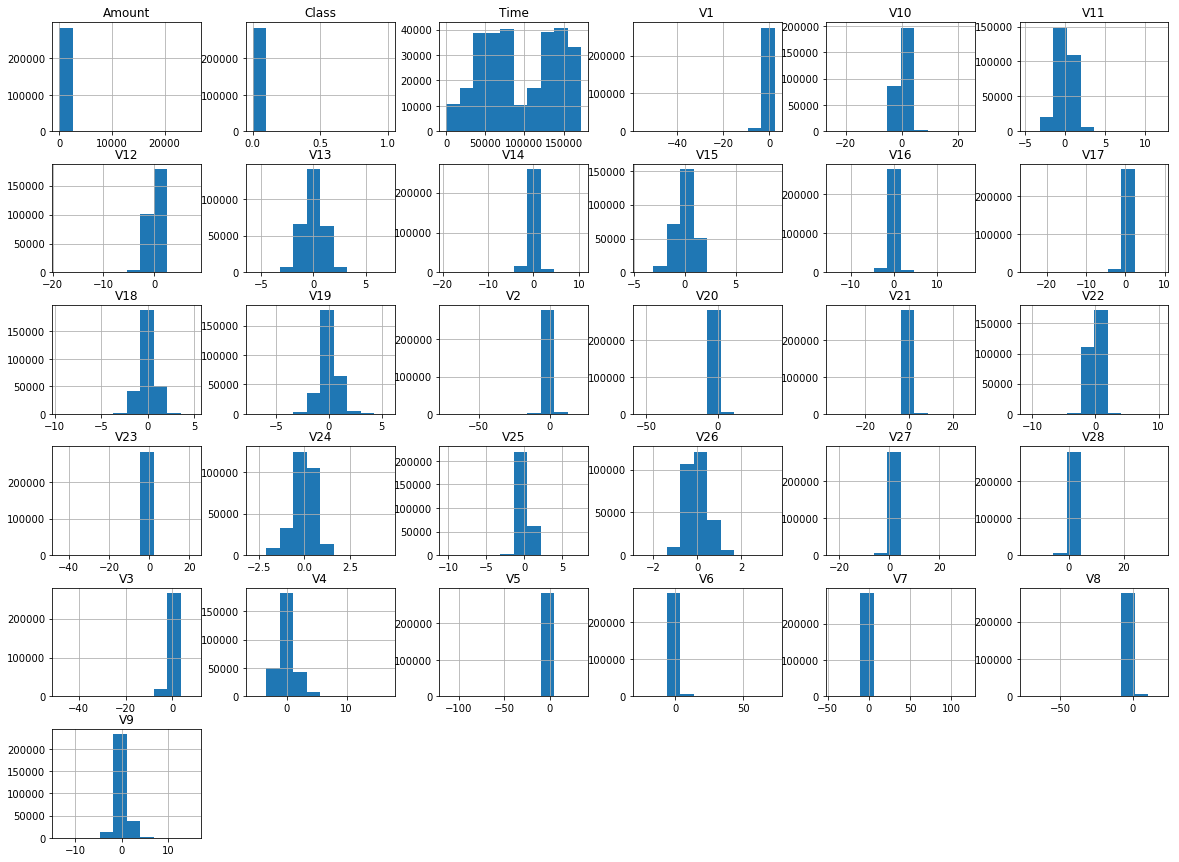

In [6]:
df.hist(figsize=(20,15))
pyplot.show()

In [7]:

clf1 = LogisticRegression(random_state=1,penalty='l2')
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = xbg.XGBClassifier( )
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('xgb',clf4)], voting='hard')


# Faz um cross validation de 5 folds para cada um dos estimators acima (logistic, random forest, naive e o proprio)
# ensemble e mostra o accuracy de cada um deles
for clf, label in zip([clf1, clf2, clf3, clf4,eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes','XGBoost' ,'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
Accuracy: 0.99 (+/- 0.00) [naive Bayes]
Accuracy: 1.00 (+/- 0.00) [XGBoost]
Accuracy: 1.00 (+/- 0.00) [Ensemble]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


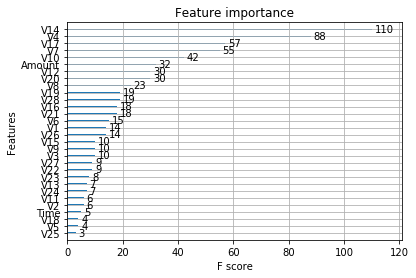

In [8]:
from xgboost import plot_importance


params = {'objective' :"binary:logistic", 
          'max_depth' : 3,
          'min_child_weight' : 100,
          'subsample' : 1,
          'colsample_bytree' : 1}

clf4 = xbg.XGBClassifier()

#print clf4.get_params().keys()

#clf4.set_params(**params)

print clf4

clf4.fit(X,y)
plot_importance(clf4)
pyplot.show()


In [9]:
clf4.feature_importances_

array([0.00733138, 0.02052786, 0.00879765, 0.01466276, 0.12903225,
       0.0058651 , 0.02199413, 0.08064516, 0.03372434, 0.01466276,
       0.06158358, 0.00879765, 0.04398827, 0.01026393, 0.16129032,
       0.01466276, 0.02639296, 0.08357771, 0.0058651 , 0.02785924,
       0.04398827, 0.02639296, 0.01319648, 0.01173021, 0.01026393,
       0.00439883, 0.02052786, 0.01319648, 0.02785924, 0.04692082],
      dtype=float32)

In [10]:
pred = clf4.predict(X_test)

In [11]:
res = pred == y_test
corretos = res[res == True]

In [12]:
print "Corretos: %d/(%d) %.2f%%" % (len(corretos) ,len(pred), (float(len(corretos))/float(len(pred))) * 100.0)
 

Corretos: 56938/(56962) 99.96%


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9995786664794073

In [14]:
pred = clf4.predict(X)

from sklearn.metrics import confusion_matrix

# each row in a confusion matrix represents an *actual* class, while each column represents a *predicted* class 
confusion_matrix(y,pred)

array([[227440,     11],
       [    65,    329]])

In [15]:
#help (confusion_matrix)

In [16]:
from sklearn.grid_search import GridSearchCV

parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [3,6,9],
              'min_child_weight': [1,11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100], #number of trees, change it to 1000 for better results
              'seed': [1337]}

clf = GridSearchCV(clf4, parameters, n_jobs=5, 
                   cv = 5, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X, y)

#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.3min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.7min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.8min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.8min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.8min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.9min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.1min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.2min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.0min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.2min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.2min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.2min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.3min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.1min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.2min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.3min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.1min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.05, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.1min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 14.6min


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.5min
[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.4min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=3 - 1.3min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.7min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.6min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.6min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.7min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.7min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.0min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.1min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.0min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.0min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=6 - 2.1min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.5min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.7min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.7min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=1, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 3.6min
[CV] colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.1min
[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.1min
[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.2min
[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 2.0min
[CV]  colsample_bytree=0.7, silent=1, learning_rate=0.1, min_child_weight=11, n_estimators=100, subsample=0.8, seed=1337, objective=binary:logistic, max_depth=9 - 1.9min


[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed: 26.6min finished
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


('Raw AUC score:', 0.9832488599285077)
colsample_bytree: 0.7
learning_rate: 0.1
max_depth: 9
min_child_weight: 11
n_estimators: 100
objective: 'binary:logistic'
seed: 1337
silent: 1
subsample: 0.8


In [17]:
final_model = clf.best_estimator_

pred = final_model.predict(X)

# each row in a confusion matrix represents an *actual* class, while each column represents a *predicted* class 
confusion_matrix(y,pred)

array([[227441,     10],
       [    73,    321]])